In [220]:
import random
import numpy as np


def maze_generator(maze_dimension1,maze_dimension2, maze_probability):
    
    #Creating a matrix
    data = np.zeros((maze_dimension1, maze_dimension2), dtype = int)
    
    #Generating random values using binomial function(Bernoulli Distribution) for creating a Maze
    #Generating ((maze_dimension*maze_dimension)-2) values because the start & end of maze will be 0
    x=np.random.binomial(size=((maze_dimension1*maze_dimension2)-2), n=1, p= maze_probability)
            
    #Inserting 0 at the beginning of the maze
    x=np.insert(x,0,0)
    #Inserting 0 at the end of the maze
    x=np.append(x,0)
    #Reshaping the generated array to a matrix(Maze)
    data=np.reshape(x,(maze_dimension1,maze_dimension2))
            
    return data

In [221]:
neighbour = lambda a,i,j : [ [x2,y2] for x2 in range(i-1,i+2) for y2 in range(j-1,j+2) 
                              if 0<=x2<len(a) and 0<=y2<len(a[0]) and not (x2==i and y2==j) and not(x2==i-1 and y2==j-1)and
                                  not(x2== i+1 and y2== j+1) and
                                  not(x2==i-1 and y2== j+1)and
                                  not(x2== i+1 and y2 ==j-1) and not(x2== i-1 and y2== j) and a[x2][y2]==0]

In [222]:
def markpath(matrix,prev,visited_nodes):
    cc=matrix.copy()
    node_count = np.count_nonzero(visited_nodes)
    d = [len(matrix)-1,len(matrix[0])-1]
    s=[]
    path=[d]
    path_length=1
    while s!=[0,0]:
        matrix[d[0]][d[1]]=2
        s = prev[d[0]][d[1]]
        d=[s[0],s[1]]
        path.insert(0,d)
        path_length+=1
        if visited_nodes[d[0]][d[1]] == 1:
            visited_nodes[d[0]][d[1]] = 0
        if s == [0,0]:
            matrix[s[0]][s[1]]=2
            break
    visited_nodes_to_mark = np.asarray(np.where(visited_nodes == 1)).T.tolist()
    for j in visited_nodes_to_mark:
        matrix[j[0]][j[1]] = 3
    print(matrix)
    return [path_length,node_count,path]

In [223]:
def DFS(maze,start_node):
    matrix=maze.copy()
    flag=0
    fringe=0
    visited_nodes = np.zeros((len(matrix),len(matrix[0])))
    prev = [[0 for x in range(0,len(matrix))] for y in range(0,len(matrix[0]))]
    prev[0][0]=[0,0]
    stack = [start_node]
    while stack:
        vertex = stack.pop()
        if visited_nodes[vertex[0]][vertex[1]] == 0:                
            visited_nodes[vertex[0]][vertex[1]] = 1
            neighbours = neighbour(matrix, vertex[0], vertex[1])
            stack.extend(neighbours)
            
            for i in neighbours:
                if visited_nodes[i[0]][i[1]] == 0:
                        prev[i[0]][i[1]]= vertex
                        
        if prev[len(matrix)-1][len(matrix[0])-1] !=0:
            flag=1
            break
    
    if flag==1:
        returned_list = markpath(matrix,prev,visited_nodes)
        return(matrix)
        
    
    else:
        return(0)
        

In [224]:
from collections import deque
def BFS(maze,start_node):
    fringe=0
    matrix=maze.copy()
    flag=0
    Q=deque()
    visited_nodes = np.zeros((len(matrix),len(matrix[0])))
    Q.append(start_node)
    prev = [[0 for x in range(0,len(matrix))] for y in range(0,len(matrix[0]))]
    prev[0][0]=[0,0]
    while Q:
        fringe = max(fringe,len(Q))
        curr_val = Q.popleft()
        if visited_nodes[curr_val[0]][curr_val[1]] == 0:                
            visited_nodes[curr_val[0]][curr_val[1]] = 1
            neighbours = neighbour(matrix,curr_val[0],curr_val[1])
            for i in neighbours:
                if visited_nodes[i[0]][i[1]] == 0:
                    prev[i[0]][i[1]]=curr_val
                    Q.append(i)
                    
   
        if prev[len(matrix)-1][len(matrix[0])-1] !=0:
            flag=1
            break
    if flag==1:
        returned_list = markpath(matrix,prev,visited_nodes)
        return(matrix)
    
    else:
        return 0

In [225]:
from queue import PriorityQueue
def Astarman(maze,start_node):
    matrix=maze.copy()
    flag=0
    visited_nodes = np.zeros((len(matrix),len(matrix[0])))
    prev = [[0 for x in range(0,len(matrix))] for y in range(0,len(matrix[0]))]
    prev[0][0]=[0,0]
    curr_dist = [[0 for i in range(0,len(matrix))] for j in range(0,len(matrix[0]))]
    q=PriorityQueue()
    q.put((0,start_node))
    man = [[0 for i in range(0,len(matrix))] for j in range(0,len(matrix[0]))]
    for i in range(0,len(matrix)):
        for j in range(0,len(matrix[0])):
            man[i][j] = ((len(matrix)-1-i)+ (len(matrix[0])-j))
    
    while not q.empty():
        curr_elem = q.get()
        if visited_nodes[curr_elem[1][0]][curr_elem[1][1]] == 0:
            visited_nodes[curr_elem[1][0]][curr_elem[1][1]] = 1
            neighbours=neighbour(matrix,curr_elem[1][0],curr_elem[1][1])
            for i in neighbours:
                if visited_nodes[i[0]][i[1]] == 0:
                    priority = (curr_dist[curr_elem[1][0]][curr_elem[1][1]] + 1) + man[i[0]][i[1]]
                    q.put((priority,i))
                    curr_dist[i[0]][i[1]] = curr_dist[curr_elem[1][0]][curr_elem[1][1]] + 1
                    prev[i[0]][i[1]] = curr_elem[1]
                    
        if prev[len(matrix)-1][len(matrix[0])-1] !=0:
            flag=1
            break;
    if flag ==1:
        retlist = markpath(matrix,prev,visited_nodes)
        return matrix
    else:
        return 0

In [226]:
from math import sqrt
from queue import PriorityQueue
def Astareucd(maze,start_node):
    matrix=maze.copy()
    flag=0
    visited_nodes = np.zeros((len(matrix),len(matrix[0])))
    prev = [[0 for x in range(0,len(matrix))] for y in range(0,len(matrix[0]))]
    prev[0][0]=[0,0]
    curr_dist = [[0 for i in range(0,len(matrix))] for j in range(0,len(matrix[0]))]
    q=PriorityQueue()
    q.put((0,start_node))
    
    while not q.empty():
        curr_elem = q.get()
        if visited_nodes[curr_elem[1][0]][curr_elem[1][1]] == 0:
            visited_nodes[curr_elem[1][0]][curr_elem[1][1]] = 1
            neighbours=neighbour(matrix,curr_elem[1][0],curr_elem[1][1])
            for i in neighbours:
                if visited_nodes[i[0]][i[1]] == 0:
                    priority = (curr_dist[curr_elem[1][0]][curr_elem[1][1]] + 1) + sqrt((len(matrix)-1-i[0])**2+ (len(matrix[0])-1-i[1])**2)
                    q.put((priority,i))
                    curr_dist[i[0]][i[1]] = curr_dist[curr_elem[1][0]][curr_elem[1][1]] + 1
                    prev[i[0]][i[1]] = curr_elem[1]
                    
        if prev[len(matrix)-1][len(matrix[0])-1] !=0:
            flag=1
            break;
    if flag ==1:
        retlist = markpath(matrix,prev,visited_nodes)
        return matrix
    else:
        return 0

In [227]:
a=maze_generator(250,250,0.2)
b=a.copy()
c=a.copy()
d=a.copy()

In [228]:

ans = DFS(a,[0,0])


[[2 0 0 ... 0 0 0]
 [2 0 0 ... 0 0 0]
 [2 0 1 ... 1 0 0]
 ...
 [3 3 3 ... 1 0 0]
 [3 3 3 ... 0 0 1]
 [3 3 1 ... 2 2 2]]


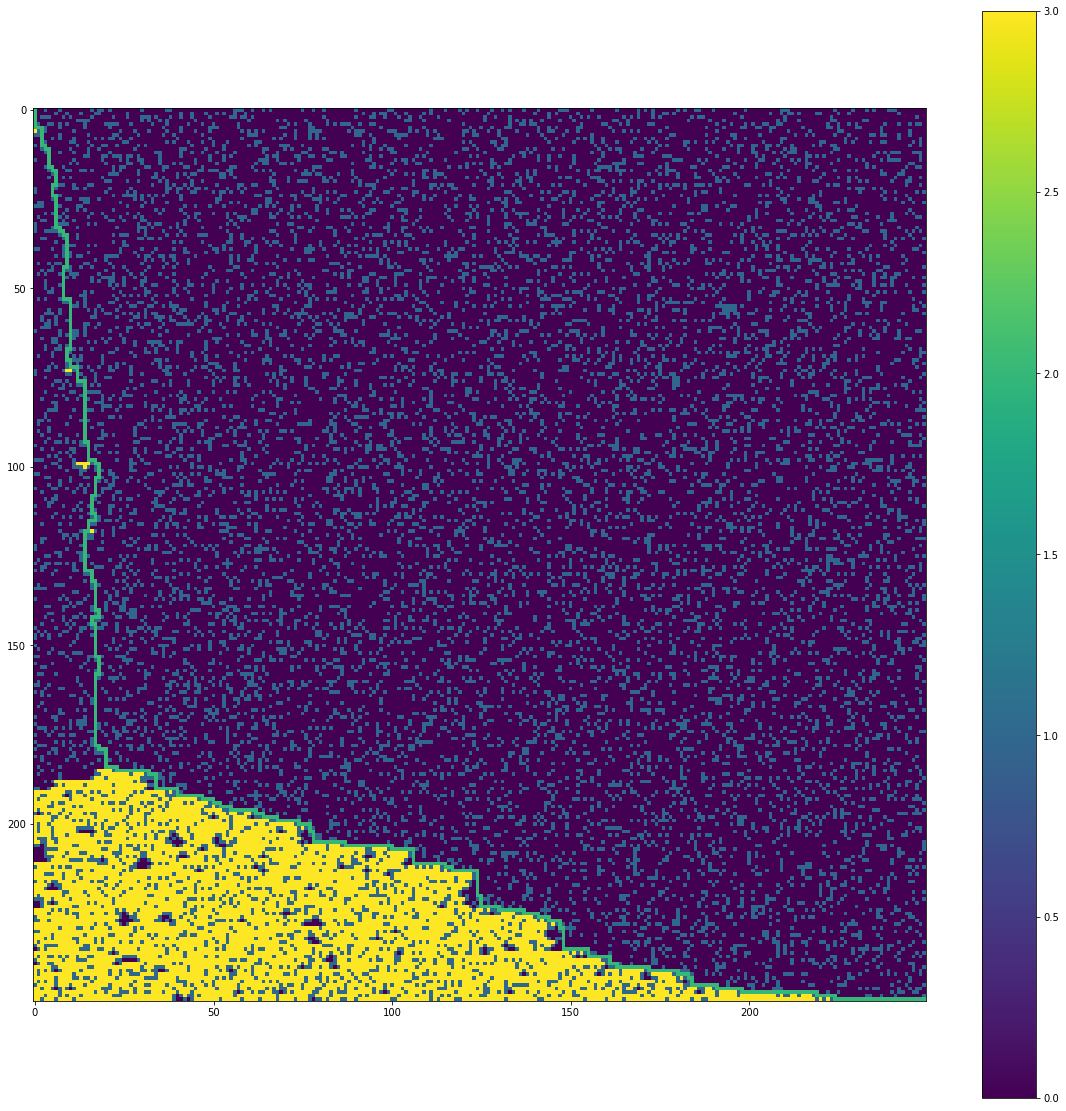

In [230]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [20,20]
plt.imshow(ans)
plt.colorbar()
plt.show()

In [231]:

ans = BFS(b,[0,0])


[[2 3 3 ... 0 0 0]
 [2 3 3 ... 0 0 0]
 [2 3 1 ... 1 0 0]
 ...
 [3 3 3 ... 1 0 0]
 [3 3 3 ... 3 3 1]
 [3 3 1 ... 2 2 2]]


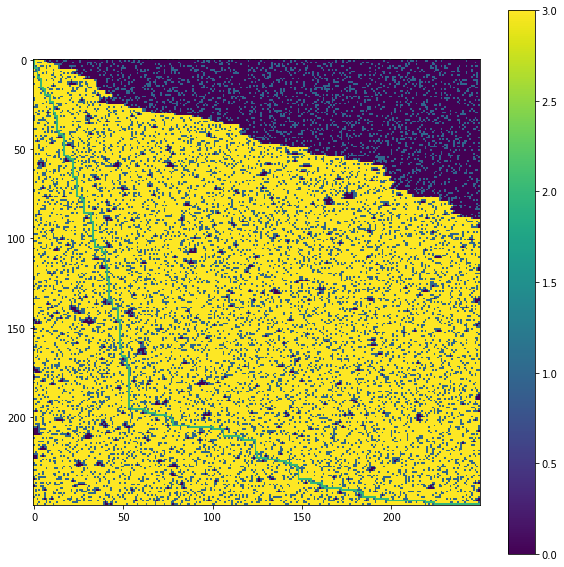

In [232]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10,10]
plt.imshow(ans)
plt.colorbar()
plt.show()

In [233]:

ans = Astarman(c,[0,0])



[[2 3 3 ... 0 0 0]
 [2 3 3 ... 0 0 0]
 [2 3 1 ... 1 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 3 3 1]
 [0 0 1 ... 2 2 2]]


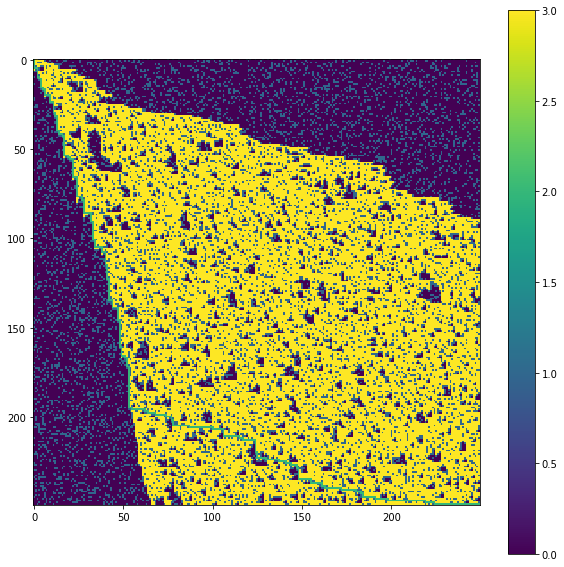

In [234]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10,10]
plt.imshow(ans)
plt.colorbar()
plt.show()

In [235]:

ans = Astareucd(d,[0,0])


[[2 3 3 ... 0 0 0]
 [2 3 3 ... 0 0 0]
 [2 3 1 ... 1 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 3 3 1]
 [0 0 1 ... 2 2 2]]


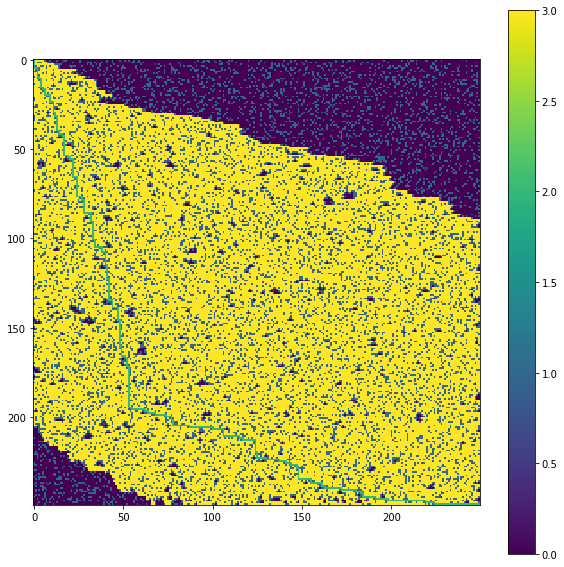

In [236]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10,10]
plt.imshow(ans)
plt.colorbar()
plt.show()